# The lac operon

The *E. coli* lac operon controls the production of enzymes needed to metabolize lactose and is regulated in large part by lactose availability.
This example model includes
- LacI (`I`) repression of the lac operon via blocking of the operator (`O`),
- lactose (`L`) transport by LacY (`Y`) permease,
- conversion of lactose to allolactose (`A`) by LacZ β-galactosidase (`Z`),
- and allolactose-mediated derepression of the operon.

In [1]:
import random
random.seed(0)

In [2]:
from pykappa.system import System

system = System.from_ka(
    """
    %init: 1 O(i[.])
    %init: 1 I(o[.])
    %init: 10 Y()
    %init: 10 Z(l[.])

    %obs: 'Extracellular lactose' |L(loc{out})| / 100
    %obs: 'LacY' |Y()|
    %obs: 'Free Lac operon' |O(i[.])|

    I(o[.]), O(i[.]) <-> I(o[1]), O(i[1]) @ 1, 0.1      // Repress the lac operon
    Y(), L(loc{out}) -> Y(), L(loc{in}) @ 0.01          // Transport lactose into the cell
    Z(l[.]), L(loc{in}) -> Z(l[.]), A(z[.], i[.]) @ 1   // Convert lactose into allolactose
    A(i[.]), I(o[.]) <-> A(i[1]), I(o[1]) @ 1, 0.1      // Deactivate the repressor by allolactose
    O(i[.]), ., . -> O(i[.]), Z(l[.]), Y() @ 1          // Express the lac operon
    L(loc{in}) -> E() @ 1                               // Metabolize lactose

    // Degradation
    A() -> . @ 0.1
    Y() -> . @ 0.5
    Z() -> . @ 0.5
    """
)

We simulate the system first without lactose, then add extracellular lactose to observe the regulatory response.

In [3]:
# Simulate a while with no extracellular lactose
while system.time < 300:
    system.update()

# Add extracellular lactose and continue simulating
system.mixture.instantiate("L(loc{out})", 1000)
while system.time < 800:
   system.update()

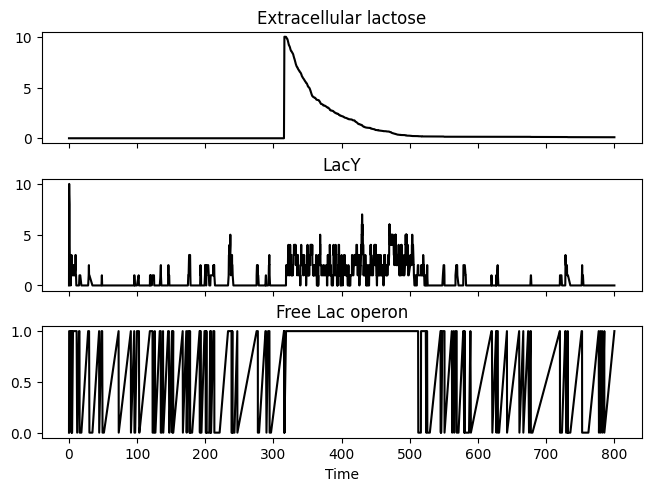

In [4]:
system.monitor.plot();

Without lactose, the operon remains mostly repressed.
When extracellular lactose is added,
- existing LacY transports some lactose into the cell,
- intracellular lactose is converted to allolactose by LacZ,
- allolactose inactivates the LacI repressor,
- derepressing the operon and leading to increased LacY and LacZ production.

As lactose is metabolized the operon is again repressed.